## COVID-19 Daily Analysis Table  
  - This-document: https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - HOW-TO-USE: see results or re-calculate on your own Notebook (Jupyter, Mybinder, Azure, ... )
  - RESULTS: WARNING ON COUNTRIES BY COVID DAILY DEATH RATES
      - rankings and trends on the worst daily deaths by country evaluating last 7 days
  - References:
      - Web charts:  https://dasn.herokuapp.com/covidzoom and https://dasn.herokuapp.com/covid19
      - wolfram & azure notebooks 
      - Data-source: John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/
  - LOOKING FOR REGIONAL SOURCES (Estado, Staat, CCAA, Canton, ...) IN ORDER TO CALCULATE BY AREA

In [16]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,Brazil,Ecuador,United Kingdom,Italy,Spain,Canada,Mexico,India,Russia,Peru,Belgium,France,Iran,Turkey,Canada
5/8/20,1518,827,50,626,243,229,94,199,96,98,87,106,243,55,48,58
5/9/20,1615,639,13,346,194,179,61,193,116,104,100,60,79,48,50,61
5/10/20,731,467,410,268,165,143,142,112,111,88,75,75,70,51,47,25


worst daily deaths by country evaluating last 7 days:


Country/Region
US                1620.333333
Brazil             523.444444
United Kingdom     482.777778
Italy              258.222222
Spain              230.888889
France             197.555556
Mexico             165.888889
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
      - data source: John Hopkins https://github.com/CSSEGISandData/COVID-19/
      - thanks to resources by http://Jupyter.org  http://MyBinder.org  http://Heroku.com and above
  - LOOKING FOR REGIONAL SOURCES (Estado, Staat, CCAA, Canton, ...) IN ORDER TO CALCULATE BY AREA

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 39.5 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 40 kB/s s eta 0:00:01    |██████████▎                     | 6.5 MB 48.2 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 110 kB/s  eta 0:00:01   |                                | 51 kB 24.0 MB/s eta 0:00:02     |█████████                       | 7.4 MB 21.1 MB/s eta 0:00:01     |███████████████████████▊        | 19.3 MB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 70.2 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 7.4 MB/s  eta 0

In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1468      0 --:--:-- --:--:-- --:--:--  1479
100 75218  100 75218    0     0   274k      0 --:--:-- --:--:-- --:--:--  781k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
Country/Region,,,,,,,,,,,,,
US,58355,60967,62996,64943,66369,67682,68922,71064,73455,75662,77180,78795,79526
United Kingdom,25302,26097,26771,27510,28131,28446,28734,29427,30076,30615,31241,31587,31855
Italy,27359,27682,27967,28236,28710,28884,29079,29315,29684,29958,30201,30395,30560
Spain,23822,24275,24543,24543,25100,25264,25428,25613,25857,26070,26299,26478,26621
France,23629,24056,24345,24563,24729,24864,25168,25498,25772,25949,26192,26271,26341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Malaysia,100,100,102,103,103,105,105,106,107,107,107,108,108
Honduras,64,66,71,75,76,82,83,93,99,105,107,108,108
Bosnia and Herzegovina,63,65,69,70,72,77,78,79,86,90,98,102,107


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
May 9th warning on Brazil Mexico in addition to cited March-30th: US UK Italy Spain France   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
Country/Region,,,,,,,,,,,,
US,2612,2029,1947,1426,1313,1240,2142,2391,2207,1518,1615,731
Brazil,430,493,406,349,290,316,571,650,602,827,639,467
Ecuador,12,17,163,308,193,5,0,49,36,50,13,410
United Kingdom,795,674,739,621,315,288,693,649,539,626,346,268
Italy,323,285,269,474,174,195,236,369,274,243,194,165
Spain,453,268,0,557,164,164,185,244,213,229,179,143
Canada,79,97,163,114,70,75,118,112,121,94,61,142
Mexico,163,127,113,89,93,117,236,197,257,199,193,112
India,71,75,69,100,68,175,127,92,104,96,116,111


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
2612,2029,1947,1426,1313,1240,2142,2391,2207,1518,1615,731"
data-datasets="430,493,406,349,290,316,571,650,602,827,639,467"
data-datasets="12,17,163,308,193,5,0,49,36,50,13,410"
data-datasets="795,674,739,621,315,288,693,649,539,626,346,268"
data-datasets="323,285,269,474,174,195,236,369,274,243,194,165"
data-datasets="453,268,0,557,164,164,185,244,213,229,179,143"
data-datasets="79,97,163,114,70,75,118,112,121,94,61,142"
data-datasets="163,127,113,89,93,117,236,197,257,199,193,112"
data-datasets="71,75,69,100,68,175,127,92,104,96,116,111"
data-datasets="105,101,96,53,58,76,95,86,88,98,104,88"
data-datasets="89,108,73,76,86,58,100,89,94,87,100,75"
data-datasets="170,93,109,62,79,80,92,323,76,106,60,75"
data-datasets="427,289,218,166,135,304,330,274,177,243,79,70"
data-datasets="80,71,63,65,47,74,63,78,68,55,48,51"
data-datasets="89,93,84,78,61,64,59,64,57,48,50,47"
data-datasets="81,52,60,27,34,120,59,55,

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Afghanistan,Algeria,Argentina,Austria,Bangladesh,Belarus,Belgium,Bolivia,Bosnia and Herzegovina,Brazil,...,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Arab Emirates,United Kingdom,US
5/7/20,2,7,9,1,13,4,76,11,4,602,...,0,8,213,99,5,57,13,8,539,2207
5/8/20,3,5,11,5,7,5,106,4,8,827,...,1,17,229,135,13,48,21,9,626,1518
5/9/20,6,6,7,1,8,5,60,8,4,639,...,1,8,179,45,7,50,15,11,346,1615
5/10/20,5,8,5,3,14,5,75,4,5,467,...,1,8,143,5,3,47,15,13,268,731


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                1775.142857
Brazil             556.428571
United Kingdom     493.714286
Italy              240.714286
France             220.285714
Spain              196.857143
Mexico             184.571429
dtype: float64

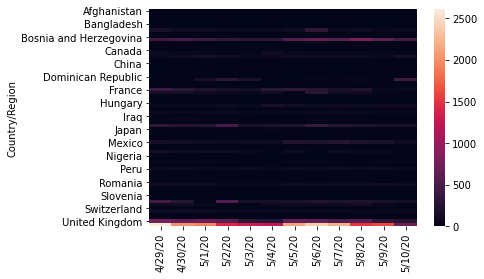

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

66 4.083333333333333


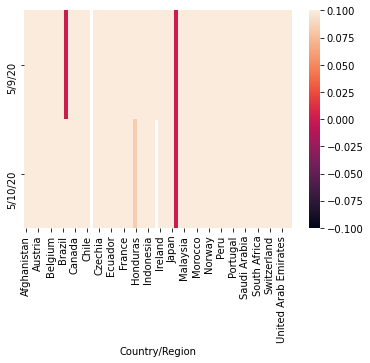

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,5/10/20
Country/Region,
Ecuador,3.625402
Bangladesh,2.369231
Nigeria,1.793478
Moldova,1.517241
Algeria,1.517241
...,...
Luxembourg,0.000000
Canada,0.000000
Malaysia,0.000000


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 11.5 MB 8.8 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=d22c2a65b1e00fb6fde0a479b83d31db6e4def14c9114f9285ff19a6d80950c9
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
